In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import seaborn as sns
import itertools

%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [3]:
X.shape

(178, 13)

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
y

[class_0, class_0, class_0, class_0, class_0, ..., class_2, class_2, class_2, class_2, class_2]
Length: 178
Categories (3, object): [class_0, class_1, class_2]

In [6]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle=LabelEncoder() 
y=classle.fit_transform(y) # species 열의 문자형을 범주형 값으로 전환

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
df = X.join(pd.Series(y, name='class'))

In [9]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


### GINI

In [12]:
# Classification Tree(GINI)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_gini = pd.DataFrame(columns = ['max_depths', 'accuracy_score'])


for depth in list(range(1,20)):
    dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    dtc_gini = dtc_gini.fit(X_train, y_train)
    y_test_pred = dtc_gini.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print('depth : {} / acc : {}'.format(depth, acc))
    append_row = [depth, acc]
    
    DT_gini = DT_gini.append(pd.Series(append_row, index=DT_gini.columns), ignore_index = True)

depth : 1 / acc : 0.6111111111111112
depth : 2 / acc : 0.8888888888888888
depth : 3 / acc : 0.9629629629629629
depth : 4 / acc : 0.9629629629629629
depth : 5 / acc : 0.9629629629629629
depth : 6 / acc : 0.9629629629629629
depth : 7 / acc : 0.9629629629629629
depth : 8 / acc : 0.9629629629629629
depth : 9 / acc : 0.9629629629629629
depth : 10 / acc : 0.9629629629629629
depth : 11 / acc : 0.9629629629629629
depth : 12 / acc : 0.9629629629629629
depth : 13 / acc : 0.9629629629629629
depth : 14 / acc : 0.9629629629629629
depth : 15 / acc : 0.9629629629629629
depth : 16 / acc : 0.9629629629629629
depth : 17 / acc : 0.9629629629629629
depth : 18 / acc : 0.9629629629629629
depth : 19 / acc : 0.9629629629629629


In [13]:
DT_gini

,max_depths,accuracy_score
0,1.0,0.611111
1,2.0,0.888889
2,3.0,0.962963
3,4.0,0.962963
4,5.0,0.962963
5,6.0,0.962963
6,7.0,0.962963
7,8.0,0.962963
8,9.0,0.962963
9,10.0,0.962963


Text(0, 0.5, 'accuracy_score')

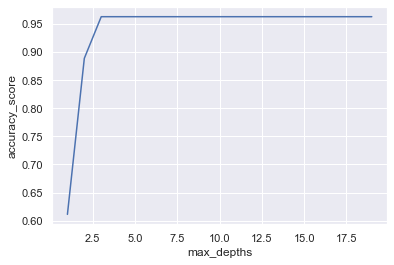

In [14]:
plt.plot(DT_gini['max_depths'], DT_gini['accuracy_score'])
plt.xlabel('max_depths')
plt.ylabel('accuracy_score')

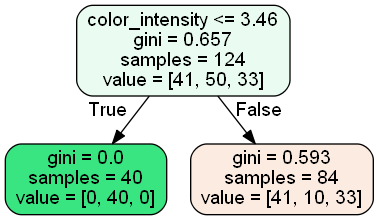

In [24]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
dtc_gini_d1 = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=1)
dtc_gini_d1 = dtc_gini_d1.fit(X_train, y_train)

dot_data = export_graphviz(dtc_gini_d1, filled=True, rounded=True,
                           feature_names = X_train.columns,                           
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_gini_d1.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장

from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

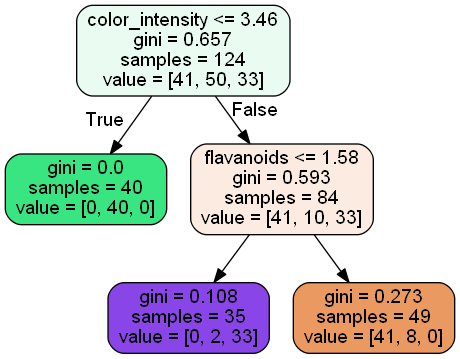

In [25]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
dtc_gini_d2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
dtc_gini_d2 = dtc_gini_d2.fit(X_train, y_train)

dot_data = export_graphviz(dtc_gini_d2, filled=True, rounded=True,
                           feature_names = X_train.columns,                           
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_gini_d2.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장

from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

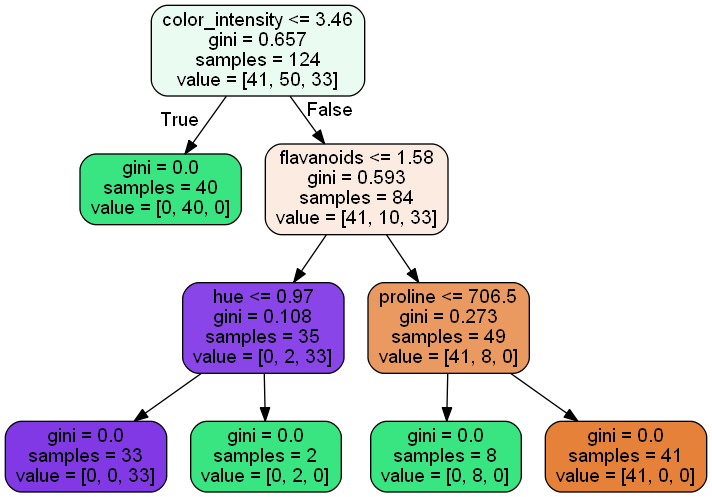

In [26]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
dtc_gini_d3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtc_gini_d3 = dtc_gini_d3.fit(X_train, y_train)

dot_data = export_graphviz(dtc_gini_d3, filled=True, rounded=True,
                           feature_names = X_train.columns,                           
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_gini_d3.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장

from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

### ENTROPY

In [16]:
# Classification Tree(GINI)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_entropy = pd.DataFrame(columns = ['max_depths', 'accuracy_score'])


for depth in list(range(1,20)):
    dtc_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)
    dtc_entropy = dtc_entropy.fit(X_train, y_train)
    y_test_pred = dtc_entropy.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print('depth : {} / acc : {}'.format(depth, acc))
    append_row = [depth, acc]
    
    DT_entropy = DT_entropy.append(pd.Series(append_row, index=DT_entropy.columns), ignore_index = True)

depth : 1 / acc : 0.6296296296296297
depth : 2 / acc : 0.8333333333333334
depth : 3 / acc : 0.9074074074074074
depth : 4 / acc : 0.9074074074074074
depth : 5 / acc : 0.9074074074074074
depth : 6 / acc : 0.9074074074074074
depth : 7 / acc : 0.9074074074074074
depth : 8 / acc : 0.9074074074074074
depth : 9 / acc : 0.9074074074074074
depth : 10 / acc : 0.9074074074074074
depth : 11 / acc : 0.9074074074074074
depth : 12 / acc : 0.9074074074074074
depth : 13 / acc : 0.9074074074074074
depth : 14 / acc : 0.9074074074074074
depth : 15 / acc : 0.9074074074074074
depth : 16 / acc : 0.9074074074074074
depth : 17 / acc : 0.9074074074074074
depth : 18 / acc : 0.9074074074074074
depth : 19 / acc : 0.9074074074074074


In [17]:
DT_entropy

,max_depths,accuracy_score
0,1.0,0.629630
1,2.0,0.833333
2,3.0,0.907407
3,4.0,0.907407
4,5.0,0.907407
5,6.0,0.907407
6,7.0,0.907407
7,8.0,0.907407
8,9.0,0.907407
9,10.0,0.907407


Text(0, 0.5, 'accuracy_score')

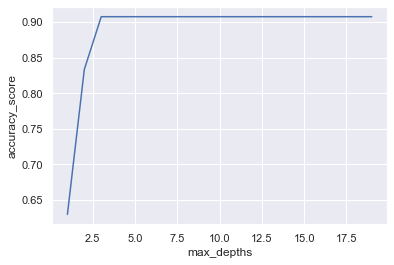

In [18]:
plt.plot(DT_entropy['max_depths'], DT_entropy['accuracy_score'])
plt.xlabel('max_depths')
plt.ylabel('accuracy_score')

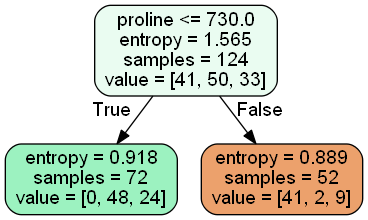

In [29]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz

dtc_entropy_d1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
dtc_entropy_d1 = dtc_entropy_d1.fit(X_train, y_train)

dot_data = export_graphviz(dtc_entropy_d1, filled=True, rounded=True,
                           feature_names = X_train.columns,
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_entropy_d1.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

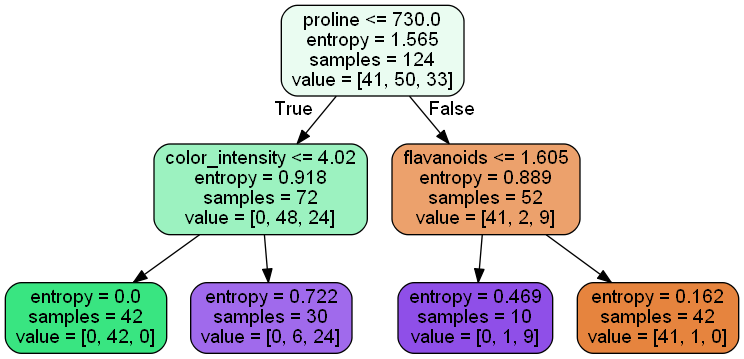

In [30]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz

dtc_entropy_d2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtc_entropy_d2 = dtc_entropy_d2.fit(X_train, y_train)

dot_data = export_graphviz(dtc_entropy_d2, filled=True, rounded=True,
                           feature_names = X_train.columns,
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_entropy_d2.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

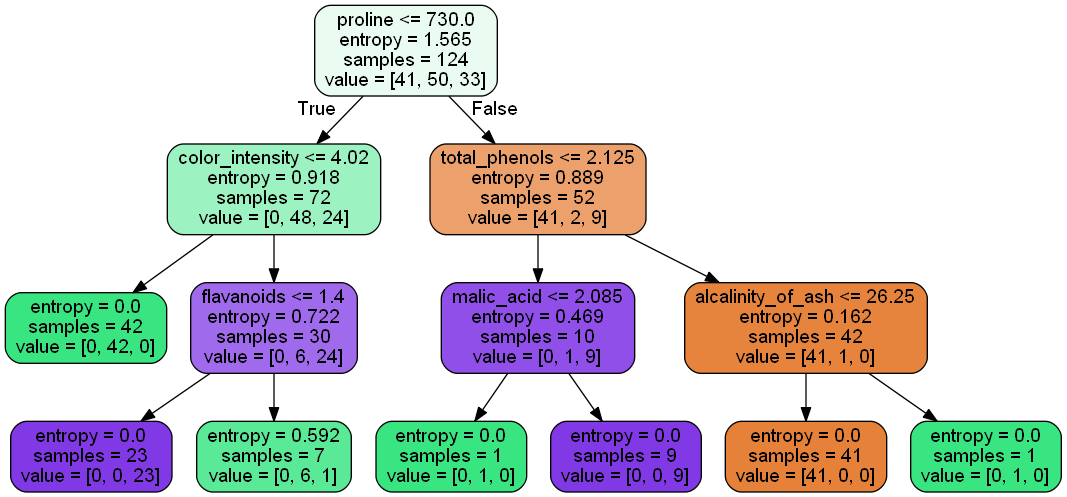

In [31]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz

dtc_entropy_d3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dtc_entropy_d3 = dtc_entropy_d3.fit(X_train, y_train)

dot_data = export_graphviz(dtc_entropy_d3, filled=True, rounded=True,
                           feature_names = X_train.columns,
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_entropy_d3.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력